In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [88]:
# 1. Columns of interest
df = pd.read_csv("../data/total_production_v1.csv")
years = df["year"].unique()
groups = df["group"].unique()
print("Years: ", years)
print("Groups: ", groups)
print("Incoming Dataframe: ")
display(df)

Years:  [1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019]
Groups:  ['April' 'July' 'October']
Incoming Dataframe: 


,country,group,year,units
0,Angola,April,1990,50.3450
1,Bolivia,April,1990,122.7770
2,Brazil,April,1990,27285.6286
3,Burundi,April,1990,487.3930
4,Ecuador,April,1990,1503.8150
...,...,...,...,...
1645,Trinidad & Tobago,October,2019,11.6910
1646,Uganda,October,2019,5509.1540
1647,Venezuela,October,2019,650.1046
1648,Viet Nam,October,2019,30487.1644


In [89]:
# Variable constants
YEAR = "Year"
PRODUCTION = "Production (In thousand 60kg bags)"
def MAIN_TITLE(aggregate: str = ""):
  return "Global Coffee Production 1990-2019 {}".format(aggregate)

In [90]:
# 0 Compute averge units by year
avg_by_year = df.groupby(["year"])["units"].mean()

# 1 Compute average units by year, group
avg_by_year_group = df.groupby(["year", "group"])["units"].mean().to_frame().reset_index()

Text(0.5, 1.0, 'Global Coffee Production 1990-2019 by Group')

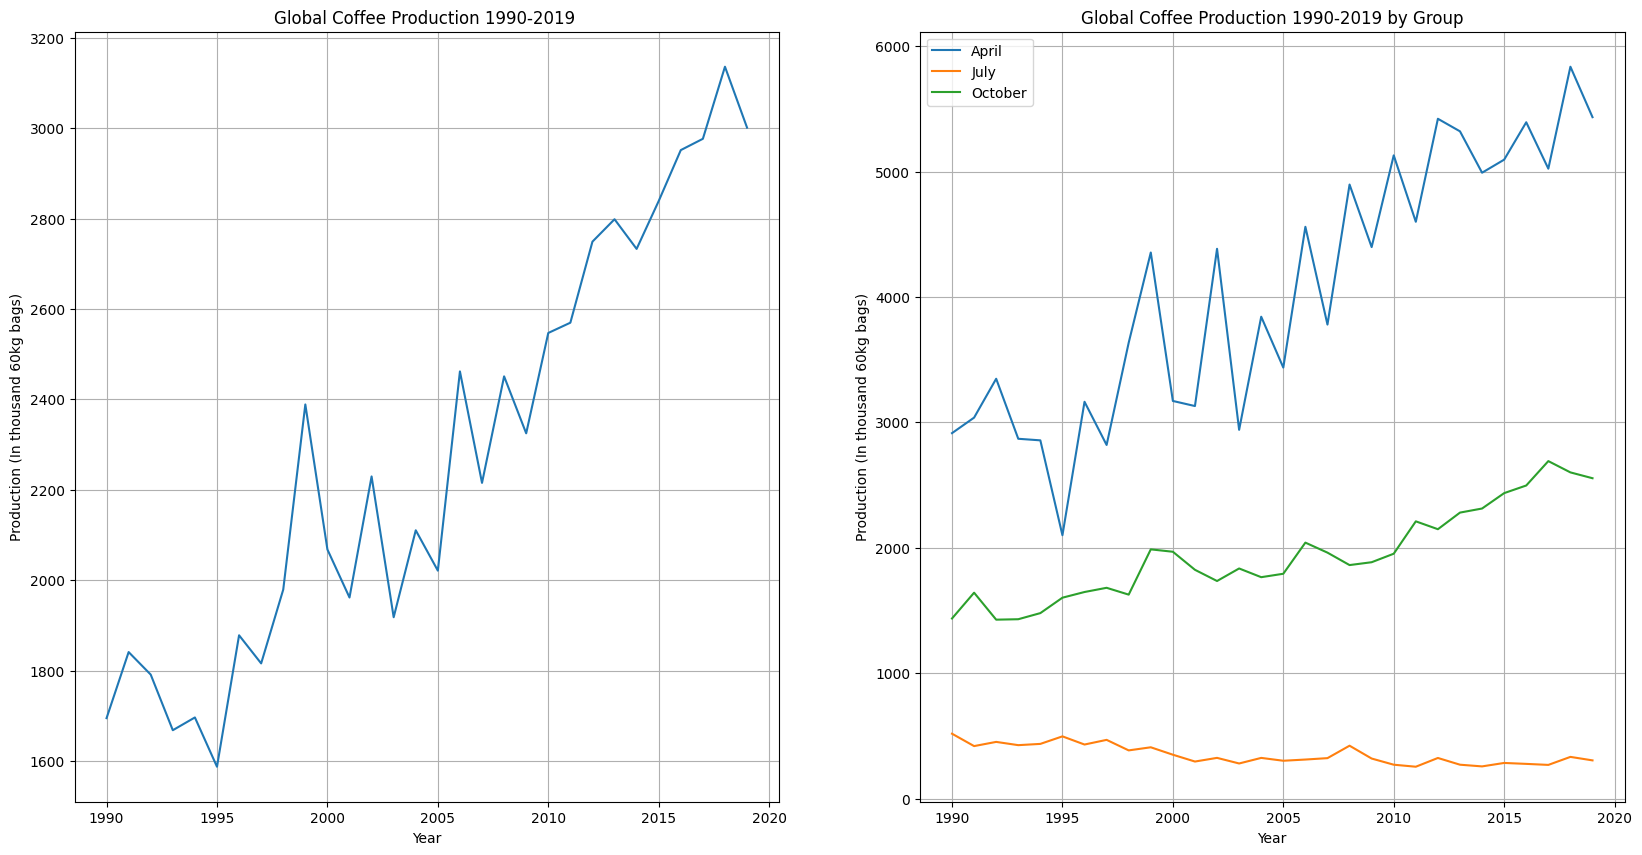

In [91]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

positions = [0, 1]
# Global Plot config
for current_position in positions:
  axs[current_position].set_xlabel(YEAR)
  axs[current_position].set_ylabel(PRODUCTION)
  axs[current_position].grid()

# Plot 0
axs[0].plot(years, avg_by_year)
axs[0].set_title(MAIN_TITLE())


# Plot 1
for group in groups: 
  group_data = avg_by_year_group[avg_by_year_group["group"] == group]["units"]
  axs[1].plot(years, group_data, label=group)

axs[1].legend()
axs[1].set_title(MAIN_TITLE("by Group"))


In [95]:
# 3. Plotting 2d distributions of variables of interest vs target variables

,country,group,year,units


In [93]:
# 4. Analyzing correlations between independent and dependent variables